In [40]:
%matplotlib inline


from __future__ import division

import copy
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
filename = 'plData.tsv'
df = pd.read_table(filename)
df

,RANK,PROPER NAME,GREEK LETTER NAME,CLASS,DIST (LY),APP MAG,ABS MAG,RAD VEL (km/s),VEL (km/s),REMARKS
0,1,Sirius,Alpha CMa,A1V,8.6,-1.46,1.43,-8.0,19.0,White dwarf companion
1,2,Canopus,Alpha Car,F0II,309,-0.72,-5.6,21.0,25.0,X-rays from hot corona; may become neon white ...
2,3,Rigil Kentaurus A,Alpha Cen A,G2V,4.36,-0.01,4.34,-23.0,33.0,"Companion Proxima Cen, 11.05 mag, M5.5V"
3,3,Rigil Kentaurus B,Alpha Cen B,K1V,4.36,1.33,5.68,-23.0,33.0,Combined magnitude -0.29; by itself would rank...
4,4,Arcturus,Alpha Boo,K1.5III,37,-0.04,-0.3,-5.0,122.0,High velocity
...,...,...,...,...,...,...,...,...,...,...
169,168,Alnasl,Gamma-2 Sgr,K0III,96,2.99,0.64,22.0,34.0,Gateway to Cepheid W Sgr
170,169,Zeta Tau,Zeta Tau,B2IIIpe,420,3.00,-2.53,20.0,22.0,Classic B-emission star
171,170,Beta Tri,Beta Tri,A5III,124,3.00,0.09,9.9,30.0,Really a dwarf; close sunlike companion
172,171,Gamma Hydrae,Gamma Hya,G8III,132,3.00,-0.04,-5.4,16.0,A star in transition


In [42]:
# f = lambda s: s[0] in 'OBAFGKM'
# df['CLASS'] = df['CLASS'].map(f)
toRemove = []
orden = {'O':'0', 'B':'1', 'A':'2', 'F':'3', 'G':'4', 'K':'5', 'M':'6'}
for i in range(len(df)):
    row = df.iloc[i]
    if row[3][0] not in ['O','B','A','F','G','K','M']:
        toRemove.append(i)
    else:
        c = row[3]
        row[3] = orden[c[0]] + c[1]
        df.iloc[i] = row
for i in toRemove:
    df = df.drop(labels = [i], axis = 0)

c:\Users\teddy\anaconda3\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [43]:
df_copy = copy.deepcopy(df)
df = df.iloc[:32]
df_copy_plot = copy.deepcopy(df)
df

,RANK,PROPER NAME,GREEK LETTER NAME,CLASS,DIST (LY),APP MAG,ABS MAG,RAD VEL (km/s),VEL (km/s),REMARKS
0,1,Sirius,Alpha CMa,21,8.6,-1.46,1.43,-8.0,19.0,White dwarf companion
1,2,Canopus,Alpha Car,30,309,-0.72,-5.6,21.0,25.0,X-rays from hot corona; may become neon white ...
2,3,Rigil Kentaurus A,Alpha Cen A,42,4.36,-0.01,4.34,-23.0,33.0,"Companion Proxima Cen, 11.05 mag, M5.5V"
3,3,Rigil Kentaurus B,Alpha Cen B,51,4.36,1.33,5.68,-23.0,33.0,Combined magnitude -0.29; by itself would rank...
4,4,Arcturus,Alpha Boo,51,37,-0.04,-0.3,-5.0,122.0,High velocity
5,5,Vega,Alpha Lyr,20,25,0.03,0.6,-14.0,19.0,Dusty circumstellar disk
6,6,Capella,Alpha Aur,48,43,0.08,-0.51,30.0,40.0,"Close binary, mags. 0.76 and 0.91"
7,7,Rigel,Beta Ori,18,860,0.12,-7,21.0,21.0,Nearby double companion; fainter one more distant
8,8,Procyon,Alpha CMi,35,11.5,0.34,2.61,-3.0,21.0,White dwarf companion
9,9,Achernar,Alpha Eri,13,140,0.46,-2.7,16.0,26.0,"Rapid rotator, oblate"


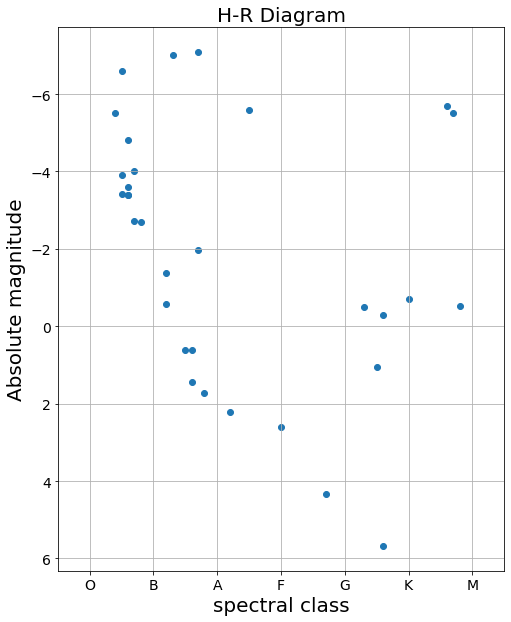

In [44]:
fig, ax = plt.subplots(figsize=(8,10))

ax.set_xlim(0, 70)
#ax.set_ylim(15, -10)
ax.invert_yaxis()
ax.grid()
ax.set_title('H-R Diagram')

ax.title.set_fontsize(20)
ax.set_xlabel('spectral class')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Absolute magnitude')
ax.yaxis.label.set_fontsize(20)

ax.scatter(df['CLASS'].astype(int), df['ABS MAG'].astype(float))
ax.set_xticks(range(5,75,10))
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
ax.tick_params(axis='both', labelsize=14)

In [45]:
count = 0
print(len(df_copy))
df_copy = df_copy.iloc[:52]
for i in range(len(df)):
    row = df.iloc[i]
    if float(row[6]) > float(row[5]):
        count += 1
print(count)

173
7


In [46]:
d = {'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0}
# 
df_copy = df_copy.iloc[:50]
for i in range(len(df_copy)):
    row = df_copy.iloc[i]
    c = row[3]
    if c[0] not in d:
        d[c[0]] = 0
    d[c[0]] += 1
print(d)
xvalues = []
yvalues = []
for i in range(7):
    xvalues.append(i)
    yvalues.append(d[str(i)])

{'0': 1, '1': 18, '2': 11, '3': 5, '4': 2, '5': 10, '6': 3}


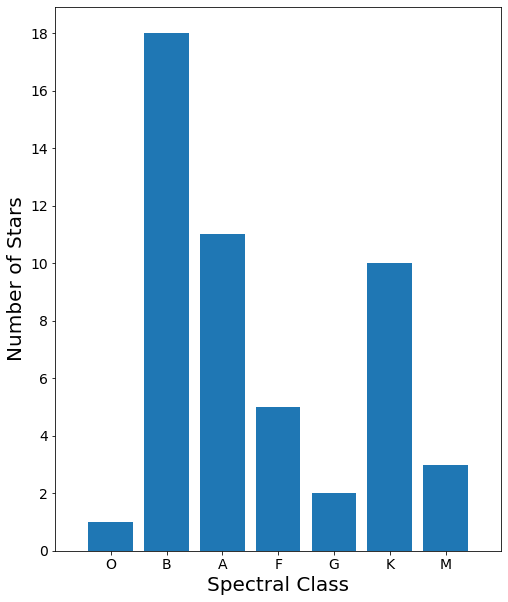

In [47]:
fig, ax = plt.subplots(figsize=(8,10))

ax.set_xlim(-1, 7)
#ax.set_ylim(15, -10)

ax.title.set_fontsize(20)
ax.set_xlabel('Spectral Class')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Number of Stars')
ax.yaxis.label.set_fontsize(20)

ax.bar(xvalues, yvalues)
ax.set_xticks(range(0,7,1))
ax.set_yticks(range(0,20,2))
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
ax.tick_params(axis='both', labelsize=14)

In [48]:
filename = 'plDistance.tsv'
df = pd.read_table(filename)
df_copy = copy.deepcopy(df)

In [49]:
toRemove = []
orden = {'O':'0', 'B':'1', 'A':'2', 'F':'3', 'G':'4', 'K':'5', 'M':'6'}
for i in range(len(df)):
    row = df.iloc[i]
    if row[2][0] not in ['O','B','A','F','G','K','M']:
        toRemove.append(i)
    else:
        c = row[2]
        if len(c) >= 1 and c[1] != '?':
            row[2] = orden[c[0]] + c[1]
            df.iloc[i] = row
        else:
            toRemove.append(i)
for i in toRemove:
    df = df.drop(labels = [i], axis = 0)

In [50]:
toRemove = []
orden = {'O':'0', 'B':'1', 'A':'2', 'F':'3', 'G':'4', 'K':'5', 'M':'6', 'L':'7', 'T':'8'}
for i in range(len(df_copy)):
    row = df_copy.iloc[i]
    if row[2][0] not in ['O','B','A','F','G','K','M', 'L', 'T']:
        toRemove.append(i)
    else:
        c = row[2]
        if len(c) >= 1 and c[1] != '?':
            row[2] = orden[c[0]] + c[1]
            df_copy.iloc[i] = row
        else:
            toRemove.append(i)
for i in toRemove:
    df_copy = df_copy.drop(labels = [i], axis = 0)

In [51]:
df = df.iloc[0:31]
df_copy = df_copy.iloc[0:50]
print(df_copy)

                              Unnamed: 0      Unnamed: 1 Unnamed: 2  \
1                              Sun (Sol)       0.0000158         42   
2       Proxima Centauri (V645 Centauri)   4.2441±0.0011         65   
3         α Centauri A (Rigil Kentaurus)   4.3650±0.0068         42   
4                 α Centauri B (Toliman)   4.3650±0.0068         51   
5           Barnard's Star (BD+04°3561a)   5.9577±0.0032         64   
6                            Luhman 16A§   6.5029±0.0011         78   
7                            Luhman 16B§   6.5029±0.0011         81   
9                   Wolf 359 (CN Leonis)     7.856±0.031         66   
10            Lalande 21185 (BD+36°2147)     8.307±0.014         62   
11                              Sirius A     8.659±0.010         21   
13              Luyten 726-8 A (BL Ceti)     8.791±0.012         65   
14              Luyten 726-8 B (UV Ceti)     8.791±0.012         66   
15           Ross 154 (V1216 Sagittarii)   9.7035±0.0019         63   
16    

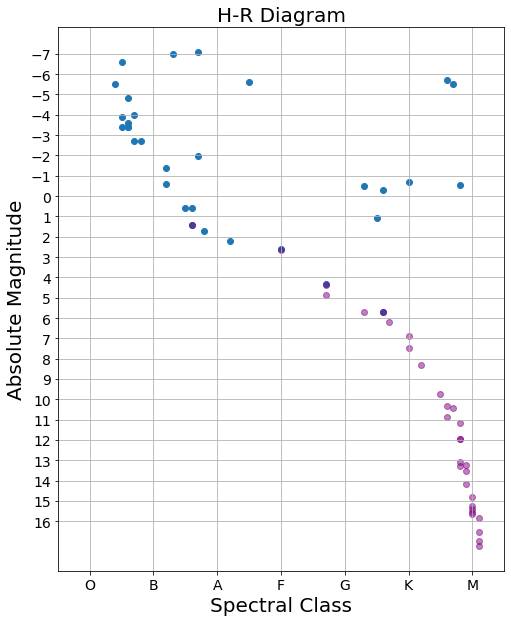

In [52]:
fig, ax = plt.subplots(figsize=(8,10))

ax.set_xlim(0, 70)
#ax.set_ylim(15, -10)
ax.invert_yaxis()
ax.grid()
ax.set_title('H-R Diagram')

ax.title.set_fontsize(20)
ax.set_xlabel('Spectral Class')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Absolute Magnitude')
ax.yaxis.label.set_fontsize(20)

ax.scatter(df_copy_plot['CLASS'].astype(int), df_copy_plot['ABS MAG'].astype(float))
ax.scatter(df['Unnamed: 2'].astype(int), df['Unnamed: 5'].astype(float), c = 'purple', alpha = 0.5)
ax.set_xticks(range(5,75,10))
ax.set_yticks(range(-7,17,1))
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
ax.tick_params(axis='both', labelsize=14)

In [53]:
d = {'0':0, '1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0, '8':0}

for i in range(len(df_copy)):
    row = df_copy.iloc[i]
    c = row[2]
    d[c[0]] += 1
print(d)
xvalues = []
yvalues = []
for i in range(9):
    xvalues.append(i)
    yvalues.append(d[str(i)])

{'0': 0, '1': 0, '2': 1, '3': 1, '4': 3, '5': 5, '6': 34, '7': 1, '8': 5}


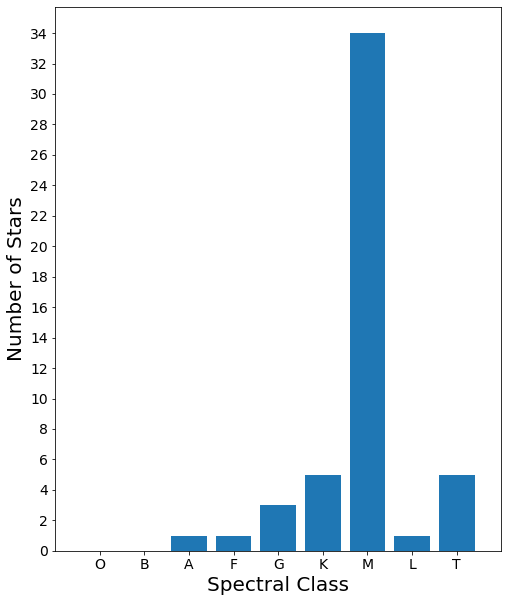

In [54]:
fig, ax = plt.subplots(figsize=(8,10))

ax.set_xlim(-1, 9)
#ax.set_ylim(15, -10)

ax.title.set_fontsize(20)
ax.set_xlabel('Spectral Class')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Number of Stars')
ax.yaxis.label.set_fontsize(20)

ax.bar(xvalues, yvalues)
ax.set_xticks(range(0,9,1))
ax.set_yticks(range(0,35,2))
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M', 'L', 'T'])
ax.tick_params(axis='both', labelsize=14)